## Emotion Detection from Text

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from wordcloud import WordCloud

In [2]:
# read data-set
data_set = pd.read_csv('./Emotion_final.csv')

In [3]:
data = data_set.head()
print(data)
data = data_set[10:15]
print(data)

print(f"shape of data set:  {data_set.shape}")

                                                Text  Emotion
0                  i didnt feel https humiliated # @  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
                                                 Text  Emotion
10  i feel like i have to make the suffering i m s...  sadness
11  i do feel that running is a divine experience ...    happy
12  i think it s the easiest time of year to feel ...    anger
13                 i feel low energy i m just thirsty  sadness
14  i have immense sympathy with the general point...    happy
shape of data set:  (21459, 2)


In [4]:
#  print each emotion count in data set
emotions = data_set['Emotion'].value_counts()
print(emotions)

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64


In [5]:
# check for null values
print(data.isnull().sum())

Text       0
Emotion    0
dtype: int64


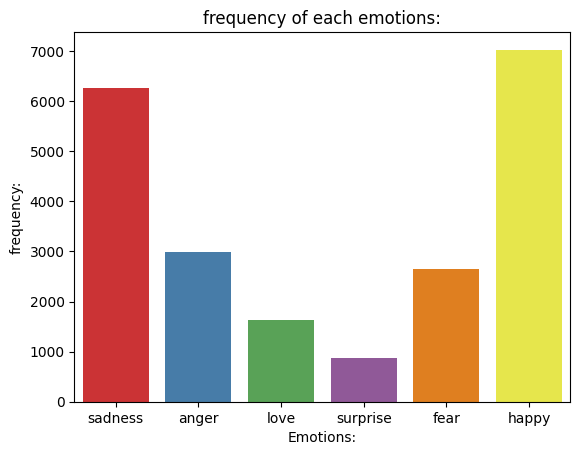

In [6]:
# plot emotions - ferquency graph
sns.countplot(x='Emotion', data=data_set, palette="Set1", dodge=False)
plt.xlabel('Emotions:')
plt.ylabel('frequency:')
plt.title('frequency of each emotions:')
plt.savefig("frequency_graph1.png")

In [7]:
data_set.Emotion = pd.Categorical(data_set.Emotion)

# added a catagorical column
data_set['Emotion_categories'] = data_set.Emotion.cat.codes
print(data_set.head())

                                                Text  Emotion  \
0                  i didnt feel https humiliated # @  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

   Emotion_categories  
0                   4  
1                   4  
2                   0  
3                   3  
4                   0  


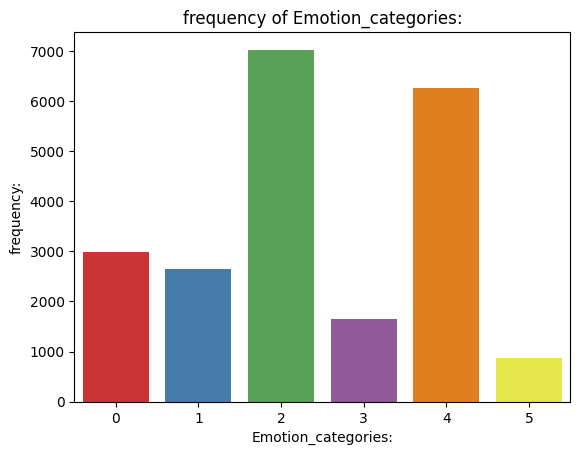

In [8]:
# plot emotion_categories and ferquency

sns.countplot(x='Emotion_categories', data=data_set, palette='Set1', dodge=False)
plt.xlabel('Emotion_categories:')
plt.ylabel('frequency:')
plt.title("frequency of Emotion_categories:")
plt.savefig("frequency_graph2.png")

In [9]:
# data cleaning
def get_clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]*', '', text)               # to remove @mentions
    text = re.sub(r'#', '', text)                           # to remove # tag
    text = re.sub(r'RT[\s]+', '', text)                     # to remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text)              # to remove hyperlinks
    text = re.sub('(\\\\u([a-z]|[0-9])+)', '', text)        # to remove unicode escape sequence character
    # text = re.sub(r'\\\\u([0-9A-Fa-f]{4})', '', text)       # to remove unicode escape sequence character
    text = re.sub(r'"', '', text)
    text = re.sub(r':', '', text)
    text = re.sub(r'https?:?', '', text)
    text = re.sub(r'href', '', text)

    return text

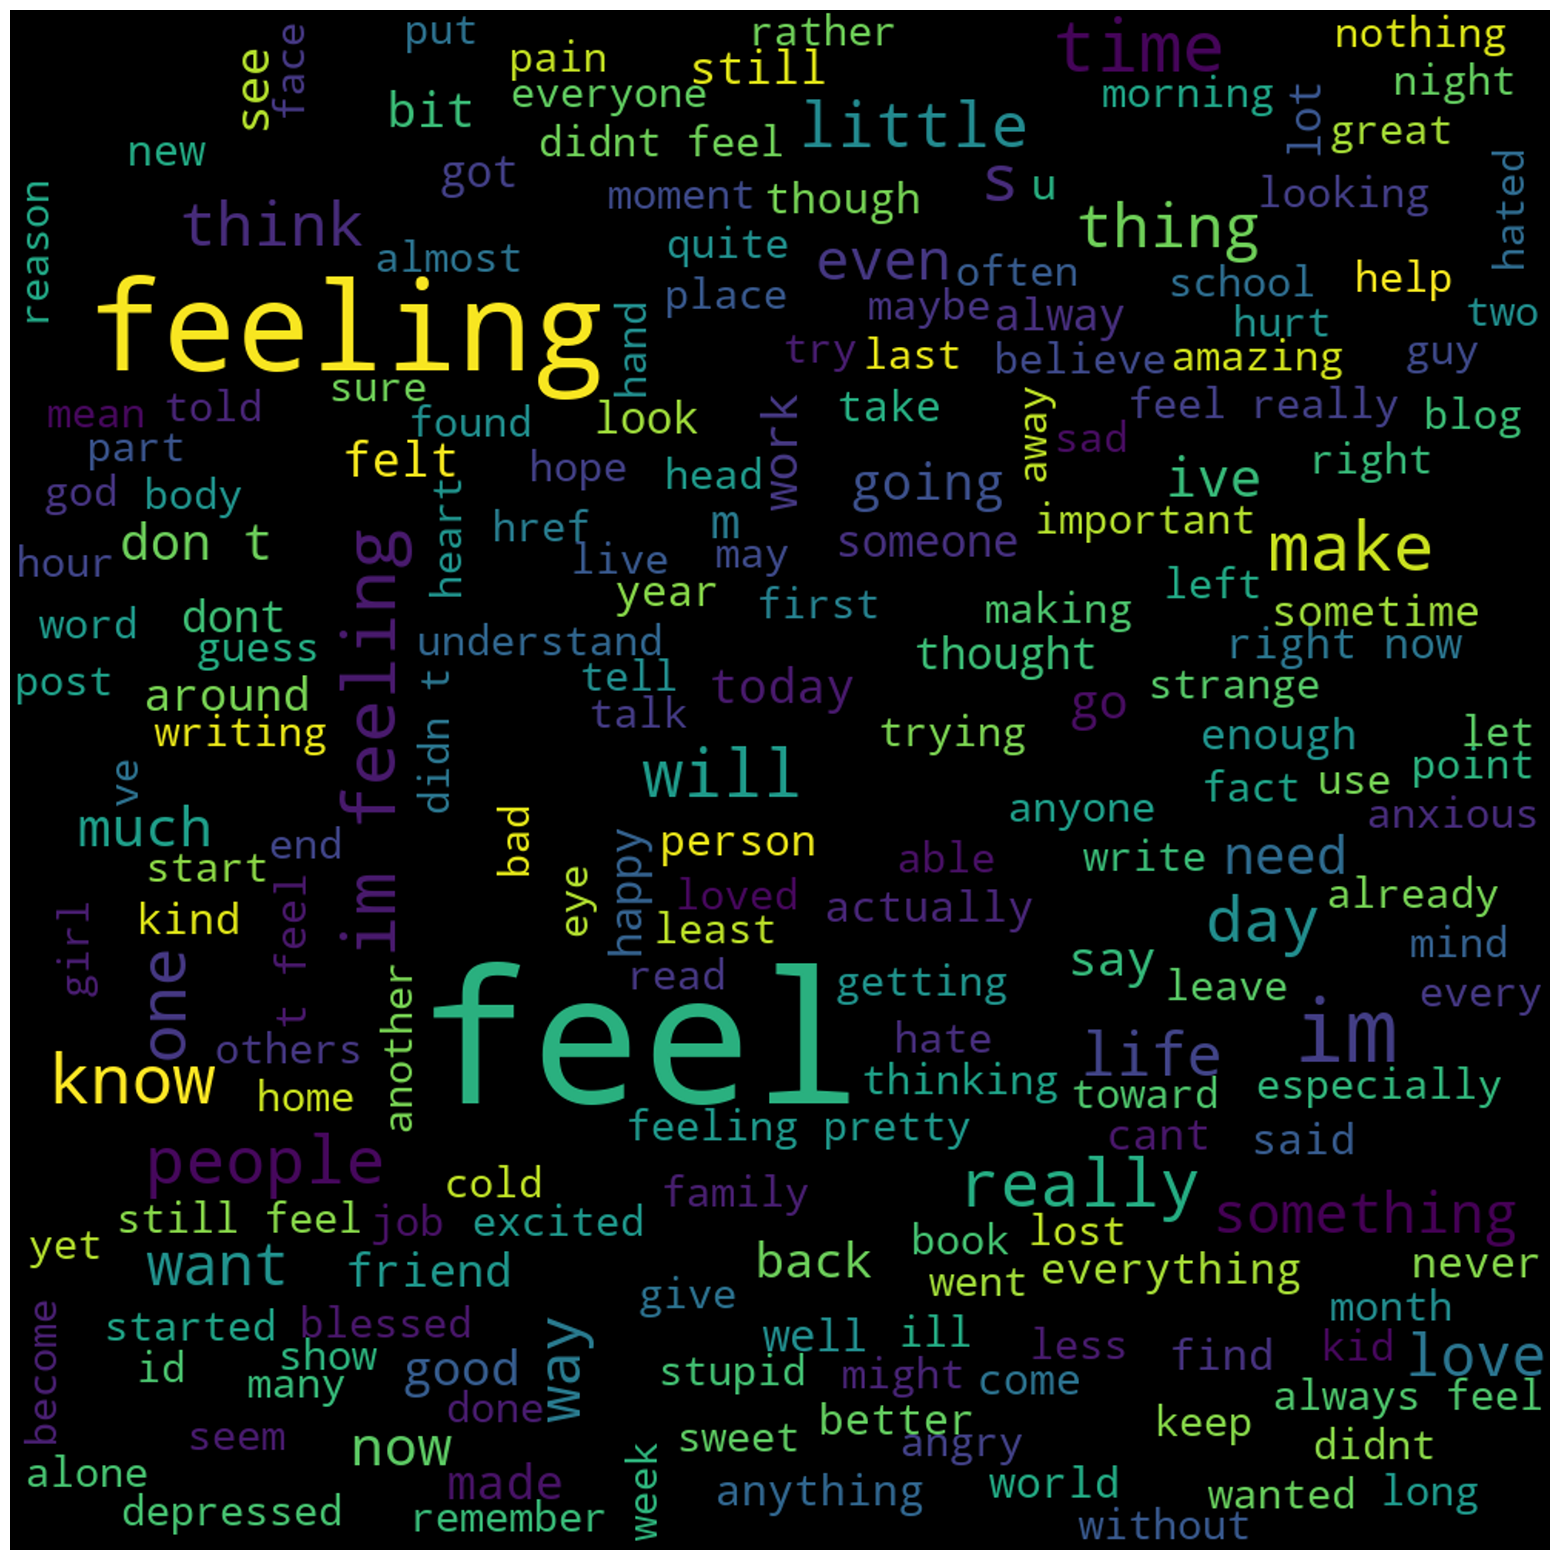

In [10]:
# forms word cloud / tokens
words = ' '.join([token for token in data_set['Text']])
word_cloud = WordCloud(width=1000, height=1000, random_state=21, min_font_size=20, max_font_size=120).generate(words)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='spline16')
plt.axis('off')
plt.savefig("wordcould.png")

In [11]:
# # CountVectorizer to converting a collection of text documents into a matrix of token counts.
# vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df = 0.7, stop_words='english')
# X = vectorizer.fit_transform(data_set['Text']).toarray()
# # The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.
# # TfidfTransformer object from the scikit-learn library. The TfidfTransformer is used to transform a count matrix (such as the one obtained from CountVectorizer) into a TF-IDF (Term Frequency-Inverse Document Frequency) representation.
# tfidfconverter = TfidfTransformer()
# X = tfidfconverter.fit_transform(X).toarray()

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, data_set['Emotion'], test_size=0.18, random_state=0)

In [13]:
# split data_set into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(data_set, data_set['Emotion'], test_size=0.18, random_state=0)

In [14]:
# CountVectorizer to converting a collection of text documents into a matrix of token counts.
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df = 0.7, stop_words='english')
X_train = vectorizer.fit_transform(X_train['Text']).toarray()

# The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.
# TfidfTransformer object from the scikit-learn library. The TfidfTransformer is used to transform a count matrix (such as the one obtained from CountVectorizer) into a TF-IDF (Term Frequency-Inverse Document Frequency) representation.
tfidfconverter = TfidfTransformer()
X_train = tfidfconverter.fit_transform(X_train).toarray()

In [15]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_test = vectorizer.transform(X_test['Text']).toarray()

In [17]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
tfidfconverter = TfidfTransformer()
X_train = tfidfconverter.fit_transform(X_train).toarray()

In [19]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### logisticRegression

In [20]:
# =========== logisticRegression ============
lr = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr.fit(X_train, y_train)
y_predict_logistic_regression = lr.predict(X_test)

In [21]:
accuracy = metrics.accuracy_score(y_test, y_predict_logistic_regression)
print("Accuracy[Logistic regression]: ", accuracy)

Accuracy[Logistic regression]:  0.8467512296142894


In [22]:
print(lr.predict(vectorizer.transform(["my pc is broken but i am really very happy as i got a new pc from my wife "])))


['happy']


In [29]:
print(lr.predict(vectorizer.transform(["Two groups fight caused delay on concert start"])))


['anger']


In [30]:
print(lr.predict(vectorizer.transform(["She hesitate to shift her house to main steet"])))


['anger']


### RandomForestClassifier

In [23]:
# ========== RandomForestClassifier ==========
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators=100, random_state=0)
classifier1.fit(X_train, y_train)

y_predict = classifier1.predict(X_test)


In [24]:
y_predict = classifier1.predict(X_test)
print("Accuracy[RandomForestClassifier]: ", metrics.accuracy_score(y_test, y_predict))

Accuracy[RandomForestClassifier]:  0.7727155060833549


In [25]:
# predicts the class or label for a new input using a trained classifier model. It uses the predict method of the classifier to make predictions on a new text input, which is represented as a feature vector using a vectorizer object.
print(classifier1.predict(vectorizer.transform(["my pc is broken but i am really very happy as i got a new pc from my wife "])))

['happy']


In [32]:
print(lr.predict(vectorizer.transform(["Two groups fight caused delay on concert start"])))
print(lr.predict(vectorizer.transform(["She hesitate to shift her house to main steet"])))


['anger']
['anger']


### Multinomial Naive Bayes

In [26]:
# =========== Multinomial Naive Bayes ===========
classifier3 = MultinomialNB()
classifier3.fit(X_train, y_train)
y_predict2 = classifier3.predict(X_test)

print("Accuracy[Multinomial Naive Bayes]: ", metrics.accuracy_score(y_test, y_predict2))
print(classifier3.predict(vectorizer.transform(["my pc is broken but i am really very happy as i got a new pc from my wife "])))


Accuracy[Multinomial Naive Bayes]:  0.8446803002847528
['sadness']


In [33]:
print(lr.predict(vectorizer.transform(["Two groups fight caused delay on concert start"])))
print(lr.predict(vectorizer.transform(["She hesitate to shift her house to main steet"])))


['anger']
['anger']
